In [1]:
# %load demo_image_display.py
#!/usr/bin/env python

# This is a demo to show how to display an image using python.

# In[1]:


import numpy as np
import matplotlib.pyplot as plt
# import required image module
from PIL import Image
import cv2
from skimage.filters import gaussian, median

# open the binary data file as binary_file
with open("mri-gauss.256.raw", "rb") as binary_file:
    #read in the entire data set as an 1-d array
    data_gauss = np.fromfile(binary_file, dtype=np.ubyte)

# reshape the data into row * col 
data_gauss = data_gauss.reshape([256,256])

#display the image, and use the color map gray
#plt.imshow(data_gauss, cmap='gray')
#plt.show()

# open the binary data file as binary_file
with open("mri-ps.256.raw", "rb") as binary_file:
    #read in the entire data set as an 1-d array
    data_ps = np.fromfile(binary_file, dtype=np.ubyte)

# reshape the data into row * col 
data_ps = data_ps.reshape([256,256])



In [2]:
def gaussian_cv2(noisedata, kernelsize,sigma):
    gaussian_cv2 = cv2.GaussianBlur(noisedata, (kernelsize,kernelsize), sigma, borderType = cv2.BORDER_CONSTANT)
    return gaussian_cv2

#def gaussian_skimage(noisedata, sigma1):
#    gaussian_skimage = gaussian(noisedata, sigma = sigma1 , mode = 'constant', cval = 0.0) 
#    return gaussian_skimage



In [3]:


X = gaussian_cv2(data_gauss, 5, 1)


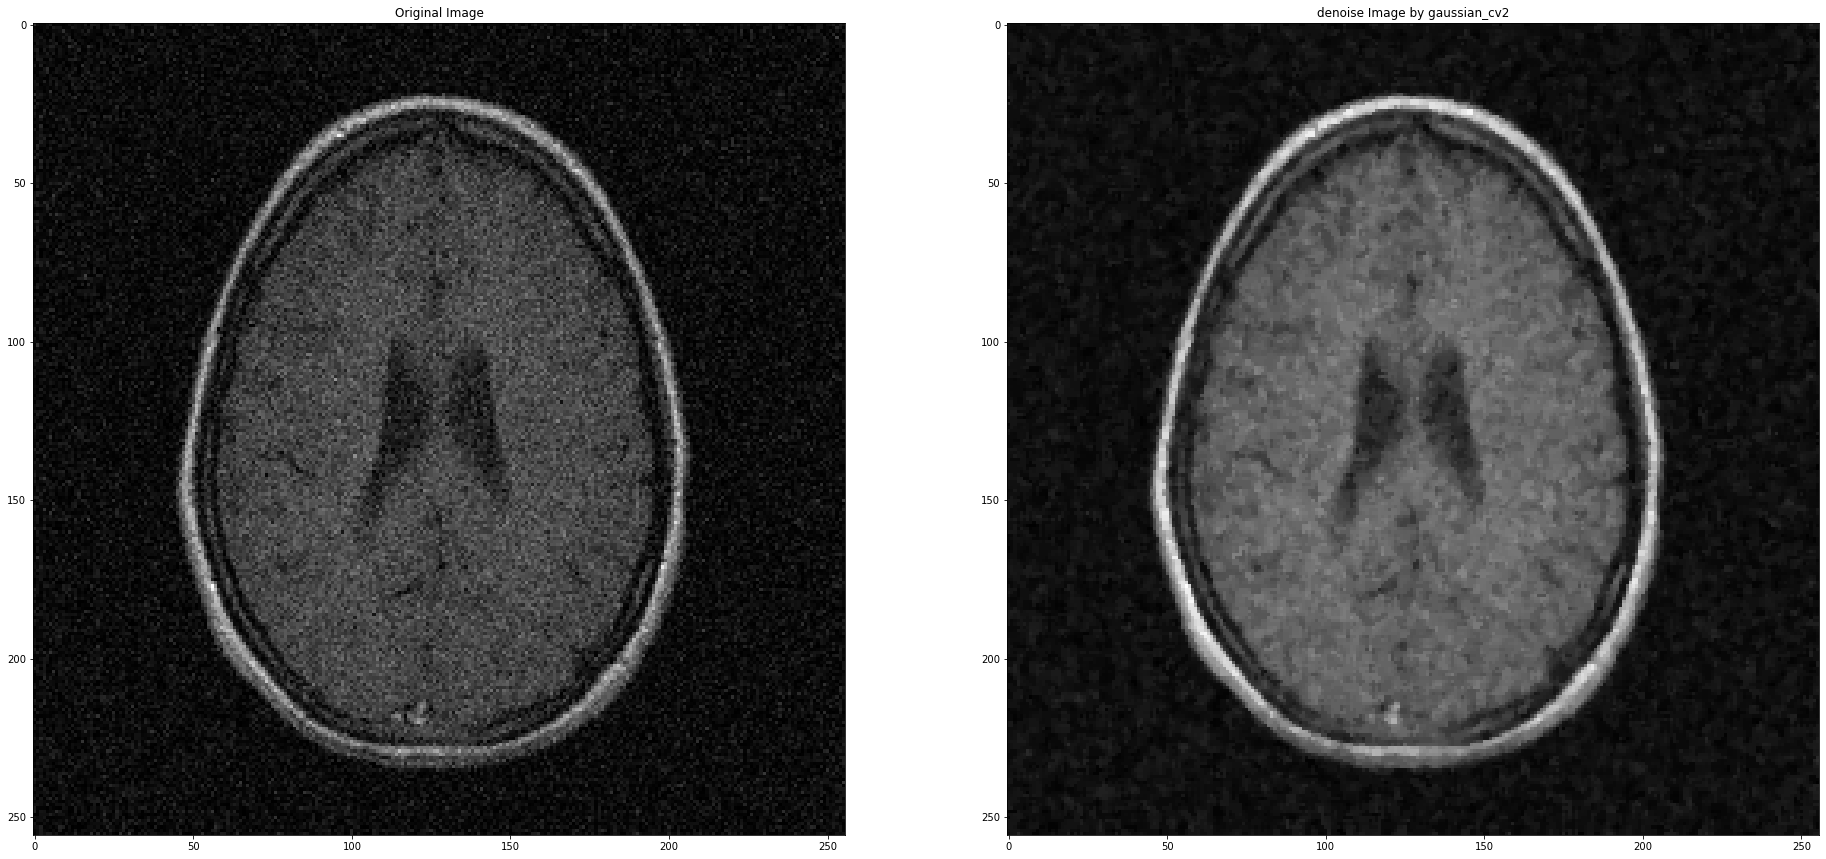

In [12]:

plt.figure( figsize=(6.4*5, 4.8*5), constrained_layout=False) #

plt.subplot(121), plt.imshow(data_gauss, 'gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(X, 'gray'), plt.title('denoise Image by gaussian_cv2')
#plt.subplot(13), plt.imshow(gaussian_skimage, 'gray'), plt.title('denoise Image by skimage')
plt.show()



In [5]:
def compare_images(noisedata,gaussian_cv2):
    Y = np.square(np.subtract(noisedata,gaussian_cv2)).mean()
    return Y

print("MSE:", compare_images(data_gauss,X))


MSE: 59.3541259765625


In [6]:
X = gaussian_cv2(data_gauss, 5, 1)
#gaussian_skimage = gaussian(data_gauss, sigma = 1, mode = 'constant', cval = 0.0) 

In [7]:
print("MSE:", compare_images(data_gauss, X))


MSE: 59.3541259765625


In [8]:


#from skimage.morphology import disk
#median_skimage = median(data_gauss, disk(3), mode = 'constant', cval = 0.0)


def median_cv2(noisedata, kernelsize):
    median_cv2 = cv2.medianBlur(data_gauss, kernelsize)
    return median_cv2


In [9]:
X = median_cv2(data_gauss,3)

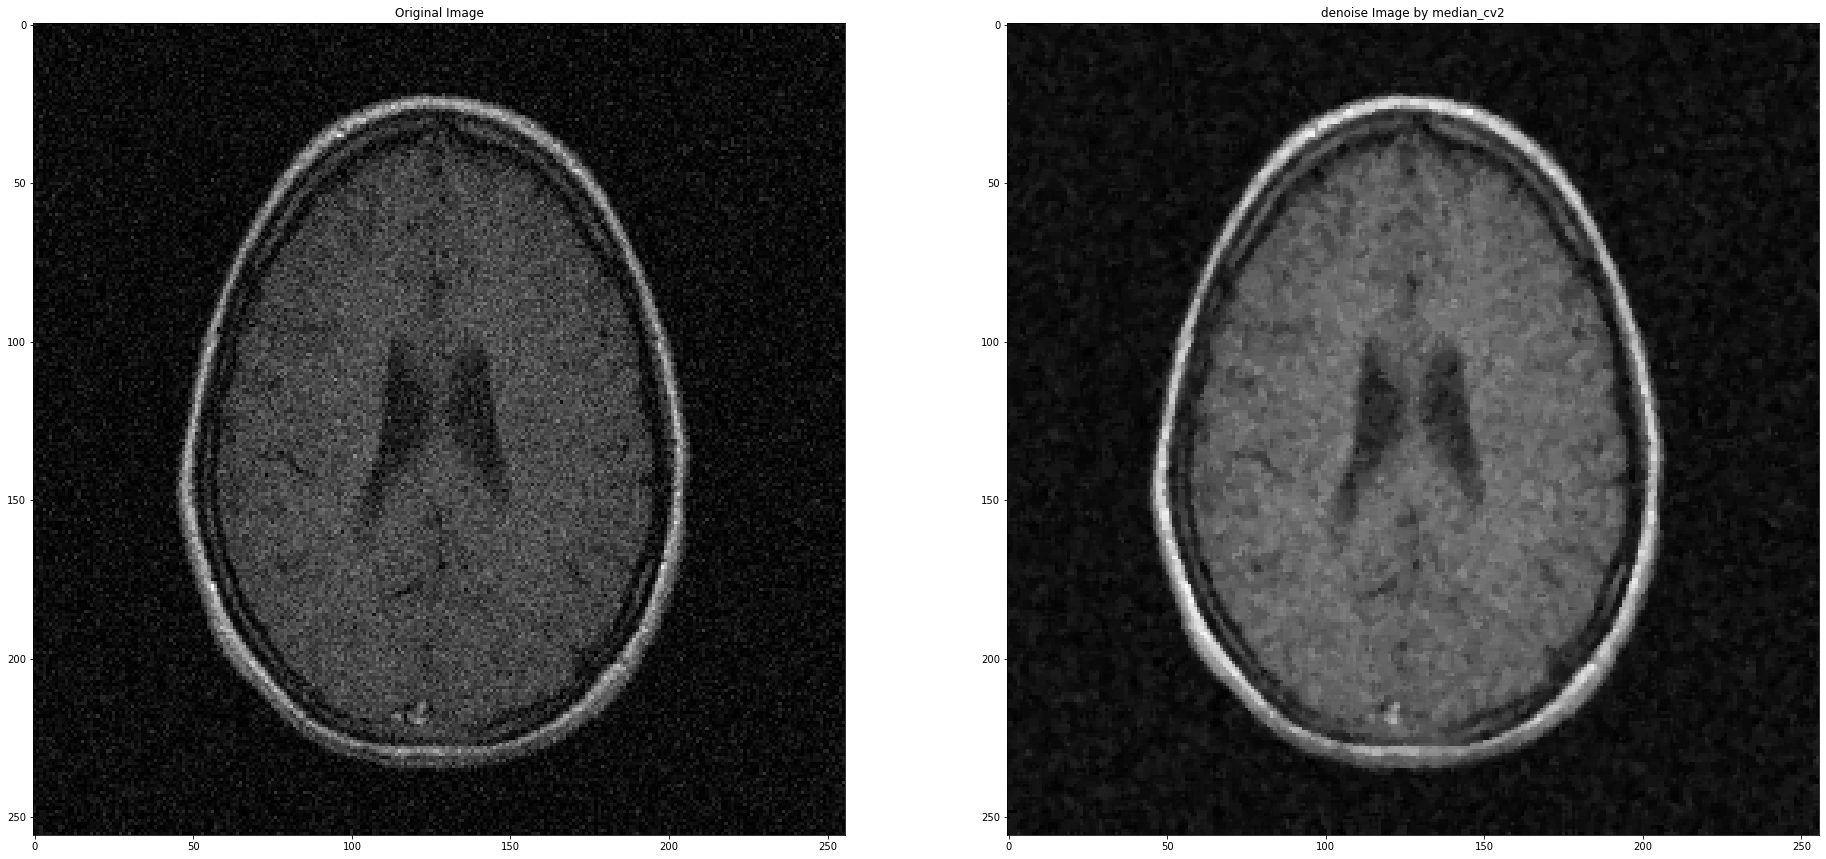

In [11]:

plt.figure( figsize=(6.4*5, 4.8*5), constrained_layout=False) #

plt.subplot(121), plt.imshow(data_gauss, 'gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(X, 'gray'), plt.title('denoise Image by median_cv2')
#plt.subplot(13), plt.imshow(gaussian_skimage, 'gray'), plt.title('denoise Image by skimage')
plt.show()


In [10]:
print("MSE:", compare_images(data_gauss, X))

MSE: 55.36015319824219


In [22]:
X = gaussian_cv2(data_ps, 3, 0)

In [21]:
print("MSE:", compare_images(data_ps, X))

MSE: 31.862625122070312


In [29]:
X = median_cv2(data_ps,7)

In [30]:
print("MSE:", compare_images(data_ps, X))

MSE: 76.60791015625
